## Combine the weather files downloaded from Weather Maps

In [1]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

from datetime import timezone
from datetime import datetime

In [2]:
#Connect to google drive
drive.mount('/content/gdrive')
#access path where notebook is stored
path = "/content/gdrive/MyDrive/Lumiere Program/Niharika Yalla/Code"
#Change the working directory to the folder
os.chdir(path)

Mounted at /content/gdrive


In [3]:
#folders where the input and output data is stored and saved
in_path = "/content/gdrive/MyDrive/Lumiere Program/Niharika Yalla/Data/Inputs/"
out_path = "/content/gdrive/MyDrive/Lumiere Program/Niharika Yalla/Data/Outputs/"
os.listdir(in_path)

['forecast_san francisco_2023-10-25_13-53-26_hourly.csv',
 'forecast_los angeles_2023-10-25_13-58-33_hourly.csv',
 'forecast_sacramento_2023-10-25_13-59-51_hourly.csv',
 'forecast_san diego_2023-10-25_14-01-54_hourly.csv',
 'forecast_san francisco_2023-10-26_07-20-23_hourly.csv',
 'forecast_san diego_2023-10-26_07-20-49_hourly.csv',
 'forecast_sacramento_2023-10-26_07-21-04_hourly.csv',
 'forecast_los angeles_2023-10-26_07-21-17_hourly.csv',
 'forecast_los angeles_2023-10-27_08-41-10_hourly.csv',
 'forecast_sacramento_2023-10-27_08-41-14_hourly.csv',
 'forecast_san diego_2023-10-27_08-41-21_hourly.csv',
 'forecast_san francisco_2023-10-27_08-41-24_hourly.csv',
 'forecast_los angeles_2023-10-31_09-09-21_hourly.csv',
 'forecast_sacramento_2023-10-31_09-09-25_hourly.csv',
 'forecast_san diego_2023-10-31_09-09-30_hourly.csv',
 'forecast_san francisco_2023-10-31_09-09-34_hourly.csv',
 'forecast_los angeles_2023-11-01_07-13-56_hourly.csv',
 'forecast_sacramento_2023-11-01_07-14-00_hourly.csv

In [6]:
df_weather_period_sacramento = pd.DataFrame()
for day in range (15,32):
  df_weather_day = pd.read_csv(in_path + 'weather_Sacramento_2023-10-{}.csv'.format(day), parse_dates=['dt'], index_col=None)
  df_weather_period_sacramento = pd.concat([df_weather_period_sacramento, df_weather_day], axis = 0)

df_weather_period_sandiego = pd.DataFrame()
for day in range (15,32):
  df_weather_day = pd.read_csv(in_path + 'weather_San Diego_2023-10-{}.csv'.format(day), parse_dates=['dt'], index_col=None)
  df_weather_period_sandiego = pd.concat([df_weather_period_sandiego, df_weather_day], axis = 0)

df_weather_period_la = pd.DataFrame()
for day in range (15,32):
  df_weather_day = pd.read_csv(in_path + 'weather_Los Angeles_2023-10-{}.csv'.format(day), parse_dates=['dt'], index_col=None)
  df_weather_period_la = pd.concat([df_weather_period_la, df_weather_day], axis = 0)

df_weather_period_sf = pd.DataFrame()
for day in range (15,32):
  df_weather_day = pd.read_csv(in_path + 'weather_San Francisco_2023-10-{}.csv'.format(day), parse_dates=['dt'], index_col=None)
  df_weather_period_sf = pd.concat([df_weather_period_sf, df_weather_day], axis = 0)

In [7]:
for day in range (1,21):
  df_weather_day = pd.read_csv(in_path + 'weather_Sacramento_2023-11-{}.csv'.format(day), parse_dates=['dt'], index_col=None)
  df_weather_period_sacramento = pd.concat([df_weather_period_sacramento, df_weather_day], axis = 0)

for day in range (1,21):
  df_weather_day = pd.read_csv(in_path + 'weather_San Diego_2023-11-{}.csv'.format(day), parse_dates=['dt'], index_col=None)
  df_weather_period_sandiego = pd.concat([df_weather_period_sandiego, df_weather_day], axis = 0)

for day in range (1,21):
  df_weather_day = pd.read_csv(in_path + 'weather_Los Angeles_2023-11-{}.csv'.format(day), parse_dates=['dt'], index_col=None)
  df_weather_period_la = pd.concat([df_weather_period_la, df_weather_day], axis = 0)

for day in range (1, 21):
  df_weather_day = pd.read_csv(in_path + 'weather_San Francisco_2023-11-{}.csv'.format(day), parse_dates=['dt'], index_col=None)
  df_weather_period_sf = pd.concat([df_weather_period_sf, df_weather_day], axis = 0)

In [8]:
df_weather_period_sacramento.sort_values(by=['dt'], ascending=True, inplace = True)
df_weather_period_la.sort_values(by=['dt'], ascending=True, inplace = True)
df_weather_period_sf.sort_values(by=['dt'], ascending=True, inplace = True)
df_weather_period_sandiego.sort_values(by=['dt'], ascending=True, inplace = True)

Text(0, 0.5, 'Temperature in Celsius')

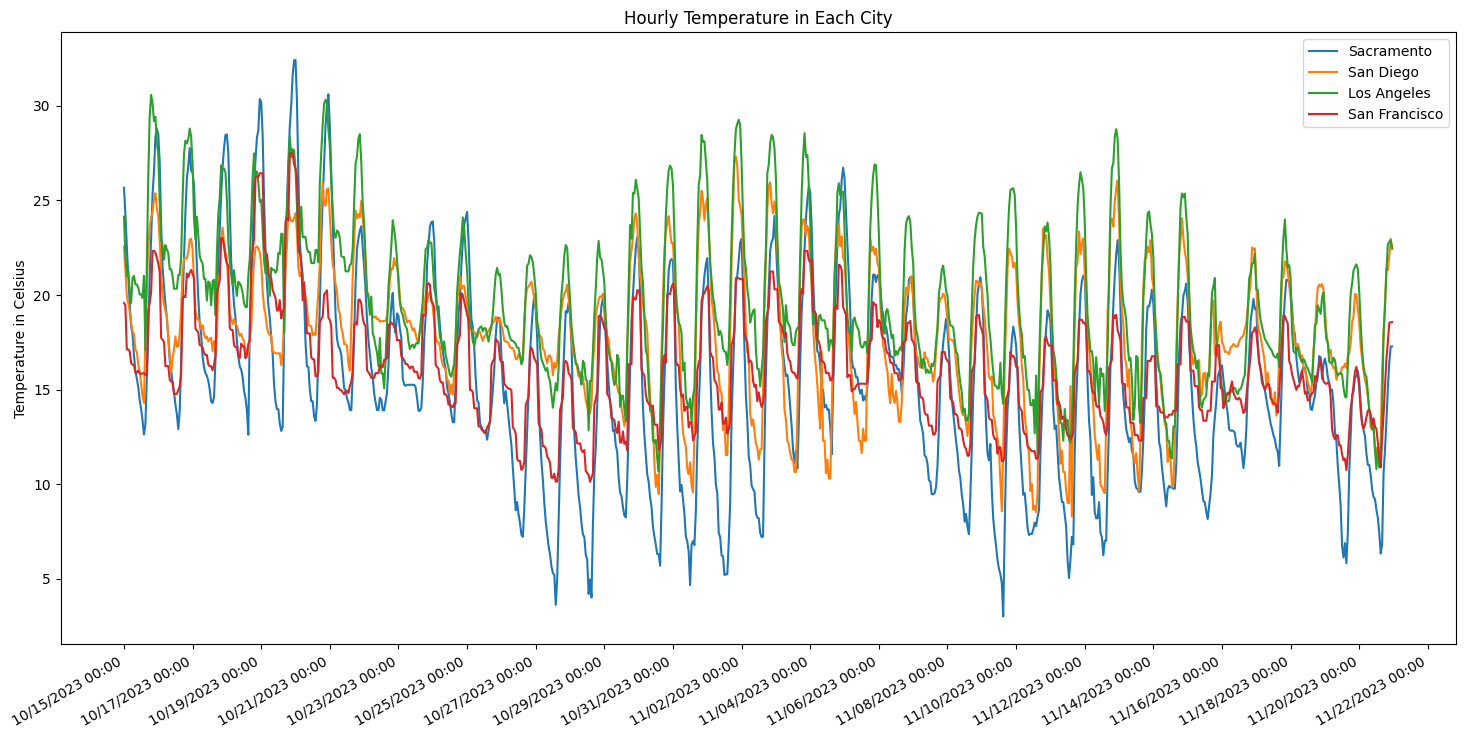

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(18,9))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 2))

plt.plot(df_weather_period_sacramento.dt, df_weather_period_sacramento.temp - 273.15, label="Sacramento")
plt.plot(df_weather_period_sandiego.dt, df_weather_period_sandiego.temp - 273.15, label="San Diego")
plt.plot(df_weather_period_la.dt, df_weather_period_la.temp - 273.15, label="Los Angeles")
plt.plot(df_weather_period_sf.dt, df_weather_period_sf.temp - 273.15, label="San Francisco")

plt.legend(loc="upper right")
plt.gcf().autofmt_xdate()

plt.title("Hourly Temperature in Each City")
plt.ylabel("Temperature in Celsius")

In [10]:
#Adding city names
df_weather_period_sacramento.insert(1, 'city', "Sacramento")
df_weather_period_sandiego.insert(1, 'city', "San Diego")
df_weather_period_la.insert(1, 'city', "Los Angeles")
df_weather_period_sf.insert(1, 'city', "San Francisco")

In [11]:
#combining the dataframes of each city
df_weather_period = pd.concat([df_weather_period_sacramento, df_weather_period_sandiego, df_weather_period_la, df_weather_period_sf ])

df_weather_period.head()

,dt,city,timezone,timezone_offset,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,clouds,visibility,wind_speed,wind_deg,weather,wind_gust,rain.1h,rain.3h,uvi
0,2023-10-15 00:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,298.82,298.41,1019,37,283.06,0,10000.0,3.09,30,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN
1,2023-10-15 01:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,297.46,297.02,1019,41,283.38,0,10000.0,3.09,10,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN
2,2023-10-15 02:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,295.71,295.27,1019,48,284.16,0,10000.0,3.09,320,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN
3,2023-10-15 03:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,294.18,293.80,1020,56,285.08,0,10000.0,2.57,210,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN
4,2023-10-15 04:00:00,Sacramento,America/Los_Angeles,-25200,2023-10-14 14:13:46,2023-10-15 01:29:54,292.77,292.46,1020,64,285.78,0,10000.0,1.54,290,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,NaN,NaN,NaN


In [12]:
#Save dataframe in data/inputs folder
#df_weather_period_both.sort_values(by=['dt', 'city'], ascending=True, inplace = True)
out_filename = 'weather_actuals_multicities.csv'
df_weather_period.to_csv(in_path + out_filename)